# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [647]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
loan_df = pd.read_csv('data/loan_analysis_data.csv')

# Set-up

In [4]:
loan_df.head()

,account_id,num_acct_users,card_type,loan_amt,loan_duration_mos,monthly_payments,district_id,num_inhabitants,num_low_pop_areas,num_med_low_pop_areas,num_med_high_pop_areas,num_high_pop_areas,num_cities,ratio_urban_pop,avg_salary,unemp_rate_95,unemp_rate_96,percent_pop_entrepreneurs,num_crimes_95,num_crimes_96,owner_age,mos_with_card,account_len_mos,is_male,target,Prague,central Bohemia,east Bohemia,north Bohemia,north Moravia,south Bohemia,south Moravia,west Bohemia,monthly_acct_bill,trans_acct_bill,weekly_acct_bill,percent_paid,num_insurance_transactions,num_household_transactions,total_insurance_amt_paid,total_house_amt_paid
0,2,2,0,80952,24,3373.0,1,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,0.167,85677.0,99107,53,0.0,177,1,1,1,0,0,0,0,0,0,0,1,0,0,1.00,0.0,65.0,0.0,472290.0
1,19,1,0,30276,12,2523.0,21,103347,87,16,7,1,7,67.0,9104,1.5,2.07,0.123,2299.0,2354,59,0.0,113,0,0,0,0,0,0,0,1,0,0,1,0,0,0.67,0.0,32.0,0.0,481000.0
2,25,1,0,30276,12,2523.0,68,228848,15,40,18,2,6,57.2,9893,4.0,4.72,0.096,5623.0,5887,36,0.0,73,1,1,0,0,0,0,1,0,0,0,1,0,0,1.00,27.0,27.0,4428.0,184059.0
3,37,1,0,318480,60,5308.0,20,70646,94,14,3,1,4,58.4,8547,2.6,3.64,0.120,1563.0,1542,46,0.0,41,1,0,0,0,0,0,0,1,0,0,1,0,0,0.02,14.0,14.0,1358.0,32438.0
4,38,1,0,110736,48,2307.0,19,51428,50,11,3,1,4,52.7,8402,3.1,3.98,0.120,999.0,1099,58,0.0,42,0,1,0,0,0,0,0,1,0,0,0,0,1,0.17,12.0,12.0,2736.0,82812.0


In [6]:
loan_df.columns

Index(['account_id', 'num_acct_users', 'card_type', 'loan_amt',
       'loan_duration_mos', 'monthly_payments', 'district_id',
       'num_inhabitants', 'num_low_pop_areas', 'num_med_low_pop_areas',
       'num_med_high_pop_areas', 'num_high_pop_areas', 'num_cities',
       'ratio_urban_pop', 'avg_salary', 'unemp_rate_95', 'unemp_rate_96',
       'percent_pop_entrepreneurs', 'num_crimes_95', 'num_crimes_96',
       'owner_age', 'mos_with_card', 'account_len_mos', 'is_male', 'target',
       'Prague', 'central Bohemia', 'east Bohemia', 'north Bohemia',
       'north Moravia', 'south Bohemia', 'south Moravia', 'west Bohemia',
       'monthly_acct_bill', 'trans_acct_bill', 'weekly_acct_bill',
       'percent_paid', 'num_insurance_transactions',
       'num_household_transactions', 'total_insurance_amt_paid',
       'total_house_amt_paid'],
      dtype='object')

In [5]:
cat_cols = [
            'num_acct_users', 'card_type', 'district_id', 'is_male', 
            'Prague', 'central Bohemia', 'east Bohemia', 'north Bohemia', 'north Moravia', 
            'south Bohemia', 'south Moravia', 'west Bohemia',
            'monthly_acct_bill', 'trans_acct_bill', 'weekly_acct_bill'
           ]

num_cols = [
            'loan_amt', 'loan_duration_mos', 'percent_paid', 'monthly_payments', 
            'owner_age', 'mos_with_card', 'account_len_mos', 'num_insurance_transactions',
            'num_household_transactions', 'total_insurance_amt_paid', 'total_house_amt_paid',
            'num_inhabitants', 'num_low_pop_areas', 'num_med_low_pop_areas', 
            'num_med_high_pop_areas', 'num_high_pop_areas', 'num_cities','ratio_urban_pop', 
            'avg_salary', 'unemp_rate_95', 'unemp_rate_96','percent_pop_entrepreneurs', 
            'num_crimes_95', 'num_crimes_96',
           ]    
target = ['target']

In [116]:
# QC right number of columns?
# Did not include target or account_id
len(loan_df[cat_cols+num_cols].columns)+2==len(loan_df.columns)

True

# Feature Selection

## Variance Threshold

In [442]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

In [443]:
ct = ColumnTransformer(
            [("Num_Cols", MinMaxScaler(), num_cols),
             ("Cat_Cols", 'passthrough', cat_cols)])

In [444]:
# Define variables
x = loan_df[num_cols+cat_cols]

# Scale the data with column transformer (i.e. only scale numerical columns)
x_scale = ct.fit_transform(x)

In [453]:
selector = VarianceThreshold(0.099)
selector.fit_transform(x_scale)

array([[0.25      , 0.95588235, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.47058824, 0.01492583, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.39705882, 0.05089647, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.57352941, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.67647059, 0.01192234, ..., 1.        , 1.        ,
        0.        ],
       [0.25      , 0.5       , 0.02230729, ..., 0.        , 1.        ,
        0.        ]])

In [454]:
selector.variances_

array([3.73955069e-02, 1.26360927e-01, 9.86198428e-02, 5.31313173e-02,
       7.93926505e-02, 1.98214716e-02, 8.34950306e-02, 4.47866547e-02,
       9.93261138e-02, 6.26706547e-03, 3.11342175e-02, 9.49342545e-02,
       4.96571113e-02, 5.07451882e-02, 5.25643054e-02, 4.92475985e-02,
       8.21480078e-02, 9.36732305e-02, 8.90385429e-02, 6.72821378e-02,
       5.71940360e-02, 7.37119627e-02, 9.88762114e-02, 1.01403577e-01,
       1.67406971e-01, 7.80714390e-01, 6.33320276e+02, 2.49894652e-01,
       1.07997007e-01, 1.14550098e-01, 1.07997007e-01, 8.14427980e-02,
       1.42123391e-01, 8.02366681e-02, 1.53372004e-01, 7.65924786e-02,
       1.47825096e-01, 4.47192577e-02, 1.15627231e-01])

In [455]:
selector.get_support()

array([False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
        True, False,  True])

In [456]:
x_vt = x.iloc[:,selector.get_support(indices=True)]
print(f'Number cols selected: {len(x_vt.columns)}... Number cols deleted: {len(x.columns)-len(x_vt.columns)}')
x_vt

Number cols selected: 14... Number cols deleted: 25


,loan_duration_mos,num_household_transactions,num_crimes_96,num_acct_users,card_type,district_id,is_male,Prague,central Bohemia,east Bohemia,north Moravia,south Moravia,monthly_acct_bill,weekly_acct_bill
0,24,65.0,99107,2,0,1,1,1,0,0,0,0,1,0
1,12,32.0,2354,1,0,21,0,0,0,0,0,0,1,0
2,12,27.0,5887,1,0,68,1,0,0,0,1,0,1,0
3,60,14.0,1542,1,0,20,1,0,0,0,0,0,1,0
4,48,12.0,1099,1,0,19,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,24,9.0,4846,1,0,7,0,0,1,0,0,0,1,0
678,60,0.0,18696,1,0,54,0,0,0,0,0,1,1,0
679,60,39.0,99107,2,0,1,0,1,0,0,0,0,0,1
680,12,46.0,2059,1,2,61,1,0,0,0,0,1,1,0


## Univariate Selection

### $\chi^2$ - Categorical Selection

In [6]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

In [785]:
# Set Categorical data
x_cat = loan_df[cat_cols]
y = loan_df['target']

# train test split
x_cat_train, x_cat_test, y_train, y_test = train_test_split(x_cat, y, test_size=0.2, random_state=3)

In [789]:
selector_chi2 = SelectKBest(score_func = chi2, k = 4)
selector_chi2.fit(x_cat_train,y_train)

SelectKBest(k=4, score_func=<function chi2 at 0x7fdffbf4ad90>)

In [790]:
selector_chi2.transform(x_cat_train)

array([[ 2,  2, 77,  0],
       [ 1,  2,  2,  0],
       [ 1,  0, 73,  0],
       ...,
       [ 1,  0, 67,  0],
       [ 2,  0, 32,  1],
       [ 1,  0, 37,  1]])

In [791]:
selector_chi2.pvalues_

array([1.04725505e-01, 7.58509441e-05, 1.25615918e-01, 8.02882829e-01,
       6.65647627e-01, 8.77182815e-01, 8.44276034e-01, 6.58259413e-02,
       4.66880027e-01, 2.24961492e-01, 8.52571618e-01, 8.12055807e-01,
       8.59877418e-01, 7.19629423e-01, 8.15301243e-01])

In [792]:
x_chi2 = x_cat.iloc[:,selector_chi2.get_support(indices=True)]
x_chi2.columns

Index(['num_acct_users', 'card_type', 'district_id', 'north Bohemia'], dtype='object')

I am choosing p-values of less than 0.15, which leaves 4 variables. 

### ANOVA - Numerical Selection

In [793]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest

In [794]:
scaler = StandardScaler()

# Set Categorical data
x_num = loan_df[num_cols]
y = loan_df[target].values.flatten()

# train test split
x_num_train, x_num_test, y_train, y_test = train_test_split(x_num, y, test_size=0.2, random_state=3)

In [795]:
x_num_train_scale = scaler.fit_transform(x_num_train)
x_num_test_scale = scaler.transform(x_num_test)

In [801]:
# Use Select K Best
selector_anova = SelectKBest(score_func= f_classif, k = 5)

# fit the selector
selector_anova.fit(x_num_train_scale, y_train)

SelectKBest(k=5, score_func=<function f_classif at 0x7fdffbf4ac80>)

In [802]:
selector_anova.pvalues_.round(4)

array([0.    , 0.237 , 0.0997, 0.    , 0.9456, 0.0333, 0.183 , 0.8903,
       0.0023, 0.9975, 0.1579, 0.8332, 0.4848, 0.4413, 0.0742, 0.5434,
       0.2407, 0.7801, 0.6025, 0.8505, 0.7811, 0.3377, 0.8018, 0.782 ])

In [803]:
x_anova = x_num.iloc[:,selector_anova.get_support(indices=True)]
list(x_anova.columns)

['loan_amt',
 'monthly_payments',
 'mos_with_card',
 'num_household_transactions',
 'num_med_high_pop_areas']

### Final Columns

I'll use the variables produced here that have ideal p-values (chosen as 0.25 or less)

In [804]:
reduced_cat_cols = list(x_chi2.columns)

reduced_num_cols = list(x_anova.columns)

In [805]:
reduced_cat_cols

['num_acct_users', 'card_type', 'district_id', 'north Bohemia']

In [806]:
reduced_num_cols

['loan_amt',
 'monthly_payments',
 'mos_with_card',
 'num_household_transactions',
 'num_med_high_pop_areas']

## Predictive Power Score

This was perhaps not as useful as I wanted it to be, but interesting to try...

In [25]:
pip install ppscore

  Running setup.py bdist_wheel for ppscore ... error
  Complete output from command /home/learner/Desktop/KD_1000ml/Project5_Financial/project5_env/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-2c5anszj/ppscore/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/tmp3cywf5z9pip-wheel- --python-tag cp36:
  /usr/lib/python3.6/distutils/dist.py:261: UserWarning: Unknown distribution option: 'use_pyscaffold'
    warnings.warn(msg)
  usage: -c [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
     or: -c --help [cmd1 cmd2 ...]
     or: -c --help-commands
     or: -c cmd --help
  
  error: invalid command 'bdist_wheel'
  
  ----------------------------------------
  Failed building wheel for ppscore
  Running setup.py clean for ppscore
Failed to build ppscore
  Running setup.py install for ppscore ... done
Note: you may need to restart the kernel to use upda

In [26]:
import ppscore as pps

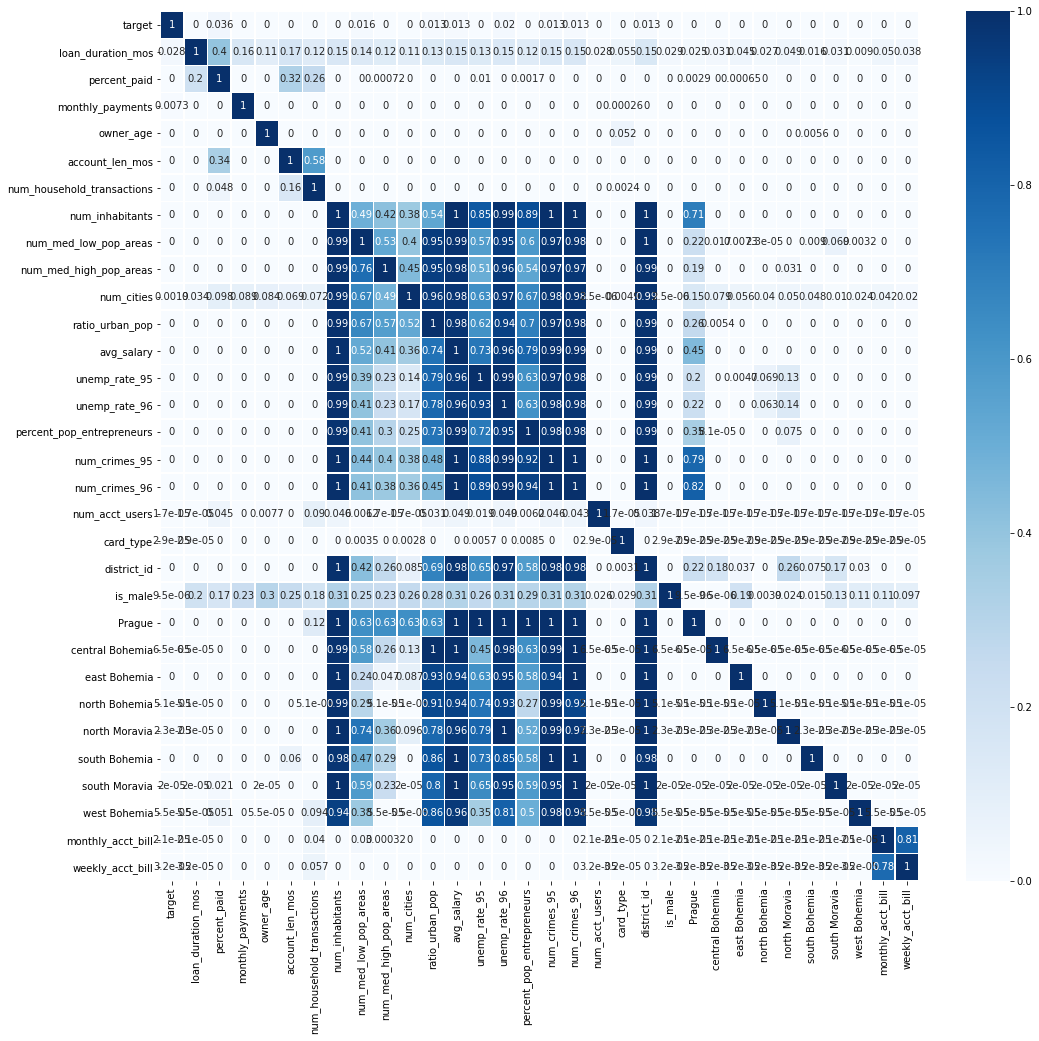

In [44]:
df_matrix = pps.matrix(loan_df[target+select_cols])

fig_dims = (17, 16)

fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(df_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True, ax=ax)

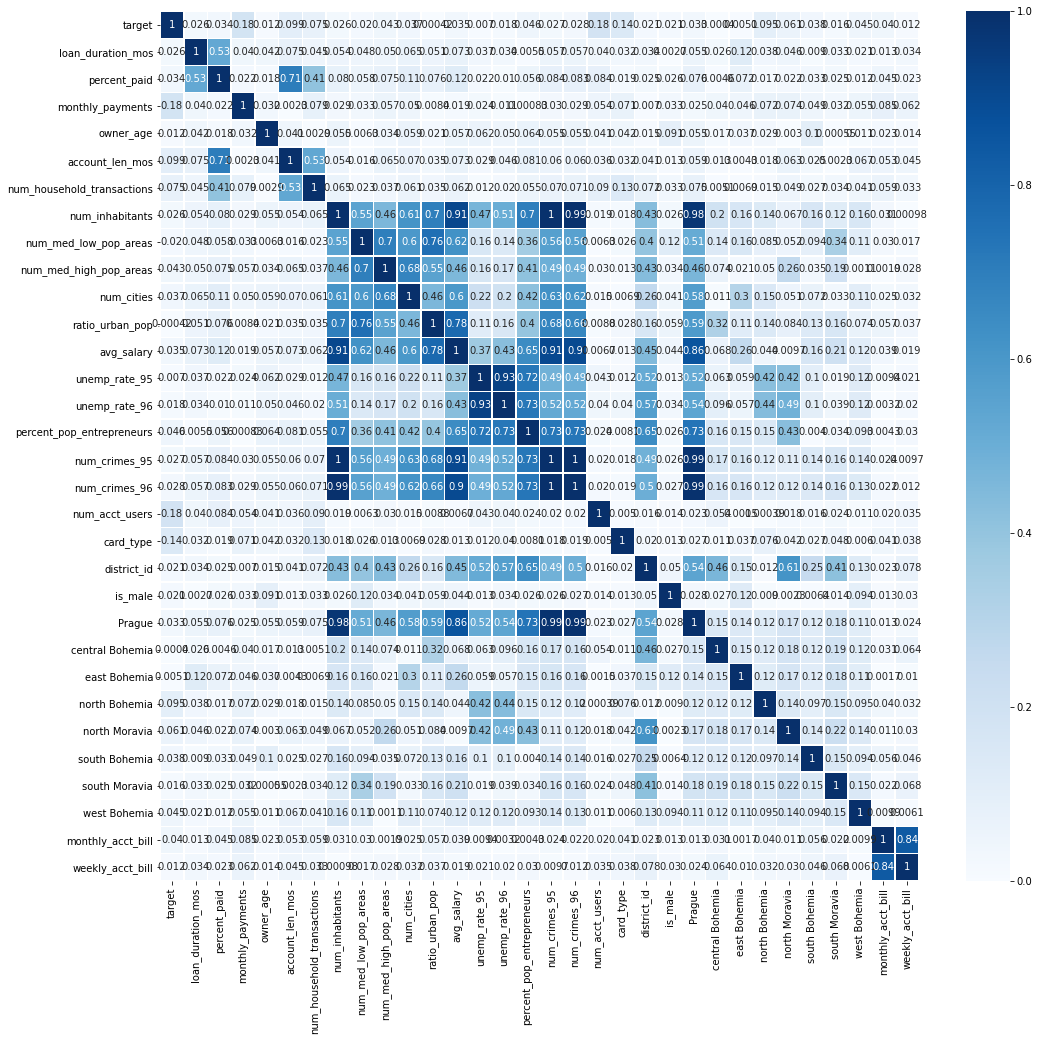

In [45]:
df_corr = loan_df[target+select_cols].corr().abs()

fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(df_corr, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True, ax=ax)

# Analysis

In [809]:
# Columns to use. We take this from both variance threshold and Anova/Chi2

# When someone requests a loan: 
# district_id is technically categoric, but needs to be scaled
request_num_cols = ['loan_amt', 
                    'monthly_payments', 
                    'mos_with_card', 
                    'num_household_transactions', 
                    'num_med_high_pop_areas',
                    'district_id'
                   ]
                
# For advertising to individuals who don't have a loan.
advert_num_cols = ['mos_with_card', 
                   'num_household_transactions', 
                   'num_med_high_pop_areas',
                   'district_id'
                  ]

cat_cols = ['num_acct_users', 
            'card_type', 
            'north Bohemia'
           ]

In [810]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [811]:
# columns to use:
reduced_cat_cols = cat_cols
reduced_num_cols = request_num_cols
# reduced_num_cols = advert_num_cols

# set, train test split and scale
# Set data
x = loan_df[reduced_cat_cols+reduced_num_cols]
y = loan_df['target']

# train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=3)

#reduced_cat_cols.remove('district_id')
transformed_cols = reduced_num_cols+reduced_cat_cols#+['district_id']

# scale the numeric data
ct = ColumnTransformer(
            [("Num_Cols", StandardScaler(), reduced_num_cols),
             ("Cat_Cols", 'passthrough', reduced_cat_cols)])

# Define scaled data as dataframes
x_train_scale = pd.DataFrame(ct.fit_transform(x_train), columns=transformed_cols)
x_test_scale = pd.DataFrame(ct.fit_transform(x_test), columns=transformed_cols)

## Logistic Regression

In [812]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

In [827]:
log_model = LogisticRegression(penalty='l2',  
                               tol=0.0001, 
                               C=0.01, 
                               class_weight='balanced',
                               random_state=3, 
                               solver='liblinear', 
                               max_iter=1000)

In [828]:
log_model.fit(x_reg_train_scale,y_reg_train)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [829]:
# Predict for scoring
y_reg_train_pred = log_model.predict(x_reg_train_scale)
y_reg_test_pred = log_model.predict(x_reg_test_scale)

In [830]:
precision_score(y_reg_train,y_reg_train_pred)

0.9608938547486033

In [831]:
precision_score(y_reg_test,y_reg_test_pred)

0.907563025210084

In [832]:
f1_score(y_reg_train,y_reg_train_pred)

0.8431372549019608

In [833]:
f1_score(y_reg_test,y_reg_test_pred)

0.8089887640449438

In [834]:
log_model.score(x_reg_train_scale,y_reg_train)

0.7495107632093934

In [835]:
log_model.score(x_reg_test_scale,y_reg_test)

0.7017543859649122

### Grid Search

In [822]:
from sklearn.model_selection import GridSearchCV

In [823]:
c_space = np.logspace(-2,4,7)

In [824]:
params = {'C':c_space,
          'penalty':['l2','l1'],
          'solver':['lbfgs','newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
         }
scores = {'prec':'precision',
           'F1':'f1'}
gs_clf = GridSearchCV(LogisticRegression(max_iter=500, class_weight='balanced',random_state=3), 
                      params,
                      scoring = scores,
                      refit = 'prec')

In [825]:
gs_clf.fit(x_train_scale,y_train)

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=500, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=3, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                         'penalty': ['l2', 'l1'],
                         'solver': ['lbfgs', 'newton-cg', 'lbfgs', 'liblinear',
                                    'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit='prec', return_train_sco

In [826]:
gs_results = pd.DataFrame(gs_clf.cv_results_)
gs_results.sort_values(by='rank_test_F1').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_prec,split1_test_prec,split2_test_prec,split3_test_prec,split4_test_prec,mean_test_prec,std_test_prec,rank_test_prec,split0_test_F1,split1_test_F1,split2_test_F1,split3_test_F1,split4_test_F1,mean_test_F1,std_test_F1,rank_test_F1
3,0.005174,0.000113,0.004289,0.000100,0.01,l2,liblinear,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.933333,0.984848,0.944444,0.959459,0.917808,0.947979,0.022928,53,0.838323,0.822785,0.829268,0.860606,0.817073,0.833611,0.015235,1
15,0.007251,0.001161,0.005535,0.000575,0.1,l2,liblinear,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.933333,0.985294,0.942857,0.973333,0.926471,0.952258,0.023009,47,0.838323,0.837500,0.814815,0.879518,0.792453,0.832522,0.028935,2
41,0.069178,0.009174,0.006264,0.001070,10,l2,saga,"{'C': 10.0, 'penalty': 'l2', 'solver': 'saga'}",0.957746,1.000000,0.940299,1.000000,0.930556,0.965720,0.029314,1,0.834356,0.820513,0.792453,0.890244,0.822086,0.831930,0.032225,3
77,0.063628,0.003042,0.005800,0.000617,10000,l2,saga,"{'C': 10000.0, 'penalty': 'l2', 'solver': 'saga'}",0.957746,1.000000,0.940299,1.000000,0.930556,0.965720,0.029314,1,0.834356,0.820513,0.792453,0.890244,0.822086,0.831930,0.032225,3
71,0.073025,0.004291,0.005299,0.000368,1000,l1,saga,"{'C': 1000.0, 'penalty': 'l1', 'solver': 'saga'}",0.957746,1.000000,0.940299,1.000000,0.930556,0.965720,0.029314,1,0.834356,0.820513,0.792453,0.890244,0.822086,0.831930,0.032225,3


In [480]:
gs_clf.best_score_

0.972589655958077

In [481]:
gs_clf.best_params_

{'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}

## Decision Trees

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtc = DecisionTreeClassifier(random_state=3, class_weight='balanced',
                             criterion='gini', 
                             max_depth=14, 
                             min_samples_split=10,
                             min_samples_leaf=5, 
                             min_weight_fraction_leaf=0.0, 
                             max_features=11, 
                             max_leaf_nodes=None, 
                             min_impurity_split=None, 
                             )

In [35]:
dtc.fit(x_train_scale,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=14, max_features=11, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')

In [36]:
dtc.feature_importances_

array([0.02350811, 0.01225474, 0.27639561, 0.18969502, 0.06635678,
       0.10566004, 0.04271841, 0.01899263, 0.07344797, 0.        ,
       0.15626867, 0.        , 0.0042196 , 0.03048243, 0.        ])

In [37]:
y_train_pred_dtc = dtc.predict(x_train_scale)
y_test_pred_dtc = dtc.predict(x_test_scale)

In [38]:
precision_score(y_train,y_train_pred_dtc)

1.0

In [39]:
precision_score(y_test,y_test_pred_dtc)

0.9548872180451128

In [40]:
f1_score(y_train,y_train_pred_dtc)

0.9311551925320887

In [41]:
f1_score(y_test,y_test_pred_dtc)

0.903914590747331

In [42]:
recall_score(y_train,y_train_pred_dtc)

0.87117903930131

In [43]:
recall_score(y_test,y_test_pred_dtc)

0.8581081081081081

### Grid Search

In [339]:
from sklearn.model_selection import GridSearchCV

In [356]:
params = {'criterion':['gini','entropy'],
          'max_depth':[11,13,14,15,16,17],
          'max_features':[11,12,13],
          'min_samples_split':[18,20,22],
          'min_samples_leaf':[5,7,9]
         }
scores = {'prec':'precision',
           'F1':'f1'}
gs_dtc = GridSearchCV(DecisionTreeClassifier(class_weight='balanced',random_state=3), 
                      params,
                      scoring = scores,
                      refit = 'prec')

In [357]:
gs_dtc.fit(x_train_scale,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=3, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
             

In [361]:
gs_dtc_results = pd.DataFrame(gs_dtc.cv_results_)
gs_dtc_results.sort_values(by='rank_test_F1').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_prec,split1_test_prec,split2_test_prec,split3_test_prec,split4_test_prec,mean_test_prec,std_test_prec,rank_test_prec,split0_test_F1,split1_test_F1,split2_test_F1,split3_test_F1,split4_test_F1,mean_test_F1,std_test_F1,rank_test_F1
63,0.008670,0.005271,0.005888,0.000791,gini,14,12,5,18,"{'criterion': 'gini', 'max_depth': 14, 'max_fe...",0.986301,0.988235,0.932584,0.922222,0.930233,0.951915,0.029076,134,0.872727,0.949153,0.917127,0.917127,0.903955,0.912018,0.024657,1
90,0.004858,0.000794,0.004657,0.000701,gini,15,12,5,18,"{'criterion': 'gini', 'max_depth': 15, 'max_fe...",0.986301,0.988235,0.932584,0.922222,0.930233,0.951915,0.029076,134,0.872727,0.949153,0.917127,0.917127,0.903955,0.912018,0.024657,1
144,0.004982,0.000300,0.004745,0.000481,gini,17,12,5,18,"{'criterion': 'gini', 'max_depth': 17, 'max_fe...",0.986301,0.988235,0.932584,0.922222,0.930233,0.951915,0.029076,134,0.872727,0.949153,0.917127,0.917127,0.903955,0.912018,0.024657,1
36,0.004611,0.001051,0.004316,0.000602,gini,13,12,5,18,"{'criterion': 'gini', 'max_depth': 13, 'max_fe...",0.986301,0.988235,0.932584,0.922222,0.930233,0.951915,0.029076,134,0.872727,0.949153,0.917127,0.917127,0.903955,0.912018,0.024657,1
117,0.004657,0.000567,0.004682,0.001370,gini,16,12,5,18,"{'criterion': 'gini', 'max_depth': 16, 'max_fe...",0.986301,0.988235,0.932584,0.922222,0.930233,0.951915,0.029076,134,0.872727,0.949153,0.917127,0.917127,0.903955,0.912018,0.024657,1


## Random Forests

In [378]:
from sklearn.ensemble import RandomForestClassifier

In [853]:
rf = RandomForestClassifier(random_state=3, class_weight='balanced', 
      n_estimators=300, 
      criterion='gini', 
      max_depth=11, 
      min_samples_split=14, 
      min_samples_leaf=7, 
      min_weight_fraction_leaf=0.0, 
      max_features=None, 
      max_leaf_nodes=None, 
      min_impurity_decrease=0.0, 
      min_impurity_split=None, 
      bootstrap=True, 
      oob_score=False, 
      max_samples=None)

In [854]:
rf.fit(x_train_scale,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=11, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=14,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [855]:
y_train_pred_rf = rf.predict(x_train_scale)

In [856]:
y_test_pred_rf = rf.predict(x_test_scale)

In [857]:
precision_score(y_train, y_train_pred_rf)

0.9908045977011494

In [858]:
precision_score(y_test, y_test_pred_rf)

0.8896551724137931

In [859]:
f1_score(y_train, y_train_pred_rf)

0.9652855543113102

In [860]:
f1_score(y_test, y_test_pred_rf)

0.8805460750853241

In [861]:
recall_score(y_train, y_train_pred_rf)

0.9410480349344978

In [862]:
recall_score(y_test, y_test_pred_rf)

0.8716216216216216

In [863]:
rf.score(x_train_scale, y_train)

0.9393346379647749

In [864]:
rf.score(x_test_scale, y_test)

0.7953216374269005

### Grid Search

In [534]:
from sklearn.model_selection import GridSearchCV

In [843]:
params = {'criterion':['gini','entropy'],
          'n_estimators':[200,300,400],
          'max_depth':[11,12,13,14],
          'max_features':[None],
          'min_samples_split':[10,12,14],
          'min_samples_leaf':[5,6,7]
         }
scores = {'prec':'precision',
          'F1':'f1'
         }
gs_rfc = GridSearchCV(RandomForestClassifier(class_weight='balanced',random_state=3), 
                      params,
                      scoring = scores,
                      refit = 'prec')

In [844]:
gs_rfc.fit(x_train_scale,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_j...
                                              oob_score=False, random_state=3,
                                

In [845]:
gs_rfc_results = pd.DataFrame(gs_rfc.cv_results_)
gs_rfc_results.sort_values(by='rank_test_prec').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_prec,split1_test_prec,split2_test_prec,split3_test_prec,split4_test_prec,mean_test_prec,std_test_prec,rank_test_prec,split0_test_F1,split1_test_F1,split2_test_F1,split3_test_F1,split4_test_F1,mean_test_F1,std_test_F1,rank_test_F1
25,1.125992,0.010726,0.052763,0.004023,gini,11,None,7,14,300,"{'criterion': 'gini', 'max_depth': 11, 'max_fe...",0.952941,0.966292,0.931034,0.908163,0.902174,0.932121,0.024792,1,0.915254,0.950276,0.905028,0.941799,0.907104,0.923892,0.018596,123
22,1.123577,0.020724,0.057473,0.011855,gini,11,None,7,12,300,"{'criterion': 'gini', 'max_depth': 11, 'max_fe...",0.952941,0.966292,0.931034,0.908163,0.902174,0.932121,0.024792,1,0.915254,0.950276,0.905028,0.941799,0.907104,0.923892,0.018596,123
19,1.168778,0.048076,0.051079,0.003241,gini,11,None,7,10,300,"{'criterion': 'gini', 'max_depth': 11, 'max_fe...",0.952941,0.966292,0.931034,0.908163,0.902174,0.932121,0.024792,1,0.915254,0.950276,0.905028,0.941799,0.907104,0.923892,0.018596,123
14,1.782363,0.153259,0.094939,0.020307,gini,11,None,6,12,400,"{'criterion': 'gini', 'max_depth': 11, 'max_fe...",0.942529,0.966292,0.931818,0.909091,0.901099,0.930166,0.023451,4,0.916201,0.950276,0.911111,0.947368,0.901099,0.925211,0.019903,44
41,1.530486,0.040651,0.065481,0.003501,gini,12,None,6,12,400,"{'criterion': 'gini', 'max_depth': 12, 'max_fe...",0.942529,0.966292,0.931818,0.909091,0.901099,0.930166,0.023451,4,0.916201,0.950276,0.911111,0.947368,0.901099,0.925211,0.019903,44


### SHAP Values

In [333]:
import shap

In [393]:
rf_explainer = shap.TreeExplainer(rf)
rf_shap_values = rf_explainer.shap_values(x_test_scale)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [395]:
# Force plot for all validation values
shap.initjs()

shap.force_plot(rf_explainer.expected_value[1],
               rf_shap_values[1],
               feature_names = reduced_num_cols+['district_id']+reduced_cat_cols)

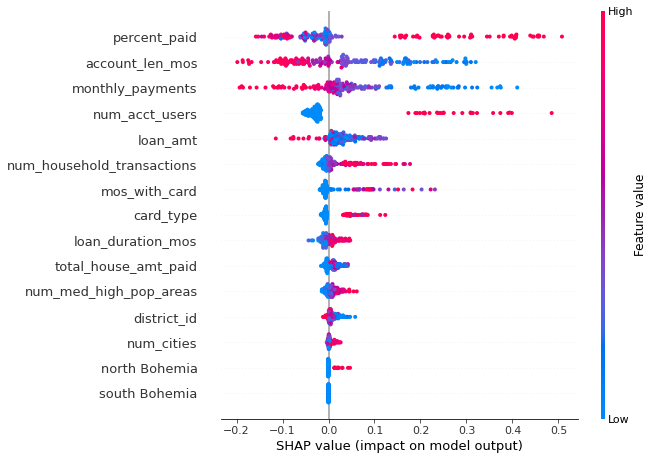

In [397]:
# summary plots 
shap.initjs()

shap.summary_plot(rf_shap_values[1],
                 features = x_test_scale,
                 feature_names = reduced_num_cols+['district_id']+reduced_cat_cols)

## Support Vector Machines

In [180]:
from sklearn.svm import SVC

### Best Kernel

In [ ]:
sv_model = SVC(random_state=None, class_weight='balanced', 
               C=1, 
               kernel='poly', 
               coef0=1,
               degree=200
               #gamma=0.1
              )
sv_model.fit(x_train_scale,y_train)

In [ ]:
y_train_pred_svm = sv_model.predict(x_train_scale)
y_test_pred_svm = sv_model.predict(x_test_scale)

In [ ]:
precision_score(y_train,y_train_pred_svm)

In [ ]:
precision_score(y_test,y_test_pred_svm)

In [ ]:
f1_score(y_train,y_train_pred_svm)

In [ ]:
f1_score(y_test,y_test_pred_svm)

In [ ]:
recall_score(y_train,y_train_pred_svm)

In [ ]:
recall_score(y_test,y_test_pred_svm)

### Grid Search - Poly

In [ ]:
from sklearn.model_selection import GridSearchCV

In [846]:
params_poly = {'C':np.logspace(-2,3,6),
          'kernel':['poly'],
          'degree':[4,5,6,7],
          'coef0':[0.5,1,1.5,2],
         }
scores = {'prec':'precision',
          'F1':'f1'
         }
gs_svm_poly = GridSearchCV(SVC(class_weight='balanced',random_state=3), 
                      params_poly,
                      scoring = scores,
                      refit = 'F1')

In [847]:
gs_svm.fit(x_train_scale,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=3, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'coef0': [0.5, 1, 1.5, 2], 'degree': [4, 5, 6, 7],
                         'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit='F1', return_train_score=False,
             scoring={'F1': 'f1', 'prec': 'precision', 'rec': 'recall'},
             verbose=0)

In [852]:
gs_svm_results = pd.DataFrame(gs_svm.cv_results_)
gs_svm_results.sort_values(by='rank_test_F1').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_coef0,param_degree,param_kernel,params,split0_test_prec,split1_test_prec,split2_test_prec,split3_test_prec,split4_test_prec,mean_test_prec,std_test_prec,rank_test_prec,split0_test_F1,split1_test_F1,split2_test_F1,split3_test_F1,split4_test_F1,mean_test_F1,std_test_F1,rank_test_F1,split0_test_rec,split1_test_rec,split2_test_rec,split3_test_rec,split4_test_rec,mean_test_rec,std_test_rec,rank_test_rec
47,0.038990,0.003476,0.007716,0.000646,1,2,7,poly,"{'C': 1.0, 'coef0': 2, 'degree': 7, 'kernel': ...",0.912088,0.910112,0.928571,0.913043,0.932584,0.919280,0.009359,65,0.907104,0.895028,0.886364,0.918033,0.922222,0.905750,0.013527,1,0.902174,0.880435,0.847826,0.923077,0.912088,0.893120,0.026652,1
58,0.041373,0.007152,0.006579,0.000205,10,1.5,6,poly,"{'C': 10.0, 'coef0': 1.5, 'degree': 6, 'kernel...",0.912088,0.910112,0.928571,0.911111,0.922222,0.916821,0.007311,68,0.907104,0.895028,0.886364,0.906077,0.917127,0.902340,0.010621,2,0.902174,0.880435,0.847826,0.901099,0.912088,0.888724,0.022897,2
82,0.024083,0.003850,0.006587,0.000239,1000,0.5,6,poly,"{'C': 1000.0, 'coef0': 0.5, 'degree': 6, 'kern...",0.901099,0.931818,0.917647,0.911111,0.931818,0.918699,0.011939,66,0.896175,0.911111,0.881356,0.906077,0.916201,0.902184,0.012339,3,0.891304,0.891304,0.847826,0.901099,0.901099,0.886527,0.019840,3
61,0.052778,0.007867,0.006782,0.000155,10,2,5,poly,"{'C': 10.0, 'coef0': 2, 'degree': 5, 'kernel':...",0.909091,0.941860,0.905882,0.913043,0.963855,0.926747,0.022540,56,0.888889,0.910112,0.870056,0.918033,0.919540,0.901326,0.019082,4,0.869565,0.880435,0.836957,0.923077,0.879121,0.877831,0.027549,13
46,0.038683,0.014952,0.008212,0.001052,1,2,6,poly,"{'C': 1.0, 'coef0': 2, 'degree': 6, 'kernel': ...",0.909091,0.940476,0.916667,0.925532,0.951220,0.928597,0.015396,52,0.888889,0.897727,0.875000,0.940541,0.901734,0.900778,0.021896,5,0.869565,0.858696,0.836957,0.956044,0.857143,0.875681,0.041539,16


### Grid Search - RBF

In [197]:
from sklearn.model_selection import GridSearchCV

In [849]:
params_rbf = {'C':np.logspace(-3,5,9),
              'gamma':np.logspace(-3,5,9),
             }
scores = {'prec':'precision',
          'F1':'f1',
          'rec':'recall'
         }
gs_svm_rbf = GridSearchCV(SVC(class_weight='balanced',random_state=3, kernel = 'rbf'), 
                      params_rbf,
                      scoring = scores,
                      refit = 'prec')

In [850]:
gs_svm_rbf.fit(x_train_scale,y_train)

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zer

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=3, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05])},
             pre_dispatch='2*n_jobs', refit='prec', return_train_score=False,
             scoring={'F1': 'f1', 'prec': 'precision', 'rec': 'recall'},
             verbose=0)

In [851]:
gs_svm_rbf_results = pd.DataFrame(gs_svm_rbf.cv_results_)
gs_svm_rbf_results.sort_values(by='rank_test_F1')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_prec,split1_test_prec,split2_test_prec,split3_test_prec,split4_test_prec,mean_test_prec,std_test_prec,rank_test_prec,split0_test_F1,split1_test_F1,split2_test_F1,split3_test_F1,split4_test_F1,mean_test_F1,std_test_F1,rank_test_F1,split0_test_rec,split1_test_rec,split2_test_rec,split3_test_rec,split4_test_rec,mean_test_rec,std_test_rec,rank_test_rec
0,0.028272,0.001717,0.015875,0.003758,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.893204,0.901961,0.901961,0.892157,0.892157,0.896288,0.004648,29,0.943590,0.948454,0.948454,0.943005,0.943005,0.945301,0.002583,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
79,0.025267,0.001135,0.010873,0.001148,100000,10000,"{'C': 100000.0, 'gamma': 10000.0}",0.893204,0.901961,0.901961,0.892157,0.892157,0.896288,0.004648,29,0.943590,0.948454,0.948454,0.943005,0.943005,0.945301,0.002583,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
42,0.023308,0.000300,0.009779,0.000252,10,1000,"{'C': 10.0, 'gamma': 1000.0}",0.893204,0.901961,0.901961,0.892157,0.892157,0.896288,0.004648,29,0.943590,0.948454,0.948454,0.943005,0.943005,0.945301,0.002583,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
43,0.025496,0.004650,0.009715,0.000269,10,10000,"{'C': 10.0, 'gamma': 10000.0}",0.893204,0.901961,0.901961,0.892157,0.892157,0.896288,0.004648,29,0.943590,0.948454,0.948454,0.943005,0.943005,0.945301,0.002583,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
44,0.023825,0.001518,0.010606,0.001683,10,100000,"{'C': 10.0, 'gamma': 100000.0}",0.893204,0.901961,0.901961,0.892157,0.892157,0.896288,0.004648,29,0.943590,0.948454,0.948454,0.943005,0.943005,0.945301,0.002583,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
51,0.024357,0.002154,0.010644,0.001221,100,1000,"{'C': 100.0, 'gamma': 1000.0}",0.893204,0.901961,0.901961,0.892157,0.892157,0.896288,0.004648,29,0.943590,0.948454,0.948454,0.943005,0.943005,0.945301,0.002583,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
52,0.023291,0.000442,0.009568,0.000194,100,10000,"{'C': 100.0, 'gamma': 10000.0}",0.893204,0.901961,0.901961,0.892157,0.892157,0.896288,0.004648,29,0.943590,0.948454,0.948454,0.943005,0.943005,0.945301,0.002583,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
35,0.022795,0.000758,0.009713,0.000218,1,100000,"{'C': 1.0, 'gamma': 100000.0}",0.893204,0.901961,0.901961,0.892157,0.892157,0.896288,0.004648,29,0.943590,0.948454,0.948454,0.943005,0.943005,0.945301,0.002583,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
53,0.023799,0.001286,0.010650,0.001024,100,100000,"{'C': 100.0, 'gamma': 100000.0}",0.893204,0.901961,0.901961,0.892157,0.892157,0.896288,0.004648,29,0.943590,0.948454,0.948454,0.943005,0.943005,0.945301,0.002583,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
61,0.024391,0.002751,0.010018,0.000135,1000,10000,"{'C': 1000.0, 'gamma': 10000.0}",0.893204,0.901961,0.901961,0.892157,0.892157,0.896288,0.004648,29,0.943590,0.948454,0.948454,0.943005,0.943005,0.945301,0.002583,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
